### Student Performance Indicator
##### Life cycle of machine learning project
1.  Understanding the problem statement
2.  Data collection
3.  Data checks to perform
4.  Exploratory data analysis
5.  Data pre-processing
6.  Model training
7.  Choose best model


1). Problem Statement\
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parent level of education, Lunch and Test preparation course.

2). Data Collection\
Datasource - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977\
data consist of 8 columns and 1000 rows

#### 2.1 Import Data and Required Packages
Import numpy, pandas, matplotlib, seaborn, Warnings Library


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as a pandas dataframe


In [67]:
df = pd.read_csv('C:/projects/mlproject/notebook/data/stud.csv')

#### Show Top 5 records

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of dataset

In [69]:
df.shape

(1000, 8)

#### 2.2 Dataset Information

In [70]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [71]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [72]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

#### 3. Data Checks to Perform
check missing values\
check duplicates\
check data types\
check the number of unique values of each column\
check statistics of the data\
check categories present in the different categorical columns

#### 3.1 Check Missing Values

In [73]:
df.isnull().sum() # no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 3.2 Check Duplicates

In [74]:
df.duplicated().sum() # no duplicates

np.int64(0)

#### 3.3 Check Data types

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check number of unique values

In [76]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [77]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

#### 3.5 Check statistics of data

In [78]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight


a) from the above description of numerical data, the means are all close - between 66 & 68.05;\
b) All standard variaiton are close - betweeen 15.16 & 15.19;\
c) While the minimum maths score is 0, writing score is much higher = 10, and reading = 17

#### 3.7 Exploring the Data

In [79]:
print("Categories in 'Gender' variable: ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'Gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [80]:
df['lunch'].dtype

dtype('O')

In [81]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [82]:
# Define numerical & Categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']

# print columns
print("we have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("\nwe have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math score', 'reading score', 'writing score']

we have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [83]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

#### 3.8 Adding Columns for "Total Score" and "Average"

In [84]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [85]:
df['math score'].max()

np.int64(100)

In [86]:
df['math score'].min()

np.int64(0)

In [87]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in reading score: {reading_full}')
print(f'Number of students with full marks in writing score: {writing_full}')
print(f'Number of students with full marks in math score: {math_full}')


Number of students with full marks in reading score: 17
Number of students with full marks in writing score: 14
Number of students with full marks in math score: 7


In [88]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students who scored less than 20 marks in maths: {math_less_20}')
print(f'Number of students who scored less than 20 marks in writing: {writing_less_20}')
print(f'Number of students who scored less than 20 marks in reading: {reading_less_20}')

Number of students who scored less than 20 marks in maths: 4
Number of students who scored less than 20 marks in writing: 3
Number of students who scored less than 20 marks in reading: 1


#### Insights
1. From the above figures, students recorded their worst performance in Maths
2. the best performance was in the reading section

#### 4 Data Exploration (Visualization)

##### 4.1 Visualize average score distribution to make some conclusions
Histogram\
Kernel Density function(kde)

##### 4.1.1 Histogram & KDE

Text(0.5, 1.0, 'Gender-based distribution')

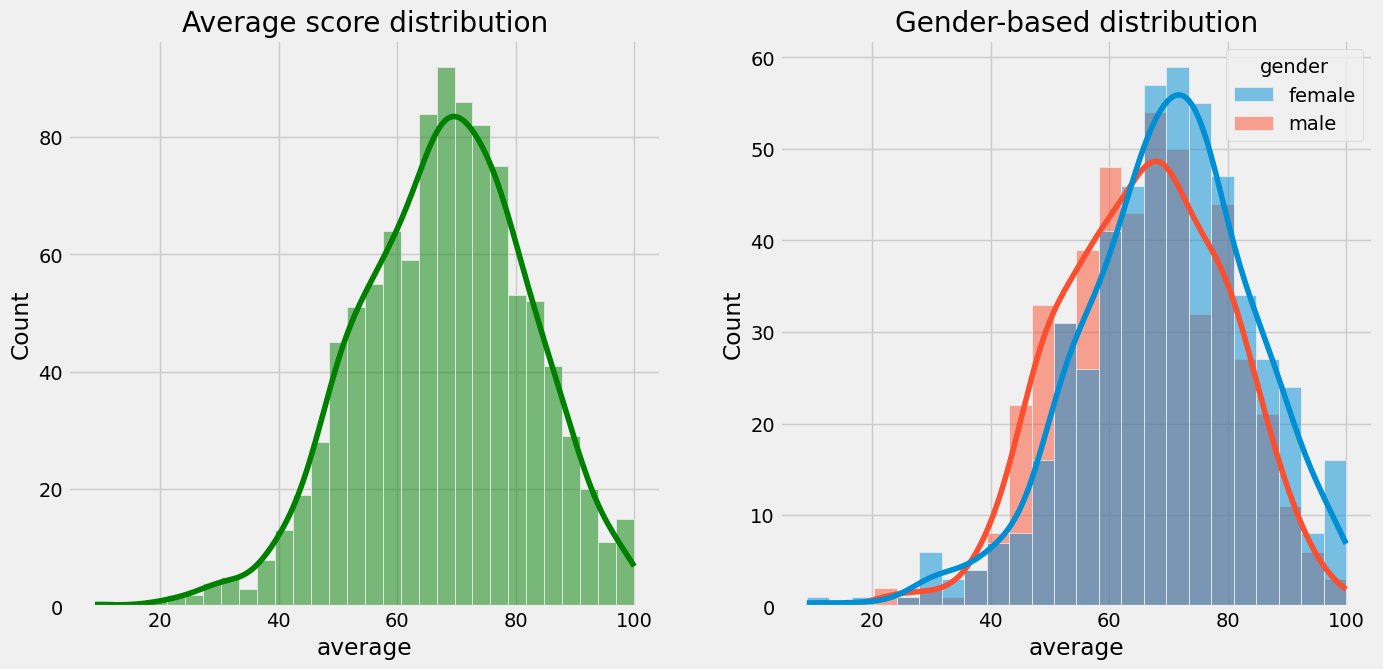

In [89]:
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.title('Average score distribution')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.title('Gender-based distribution')

##### Insight
It is readily seen that female students  outperformed the male students 

<Axes: xlabel='average', ylabel='Count'>

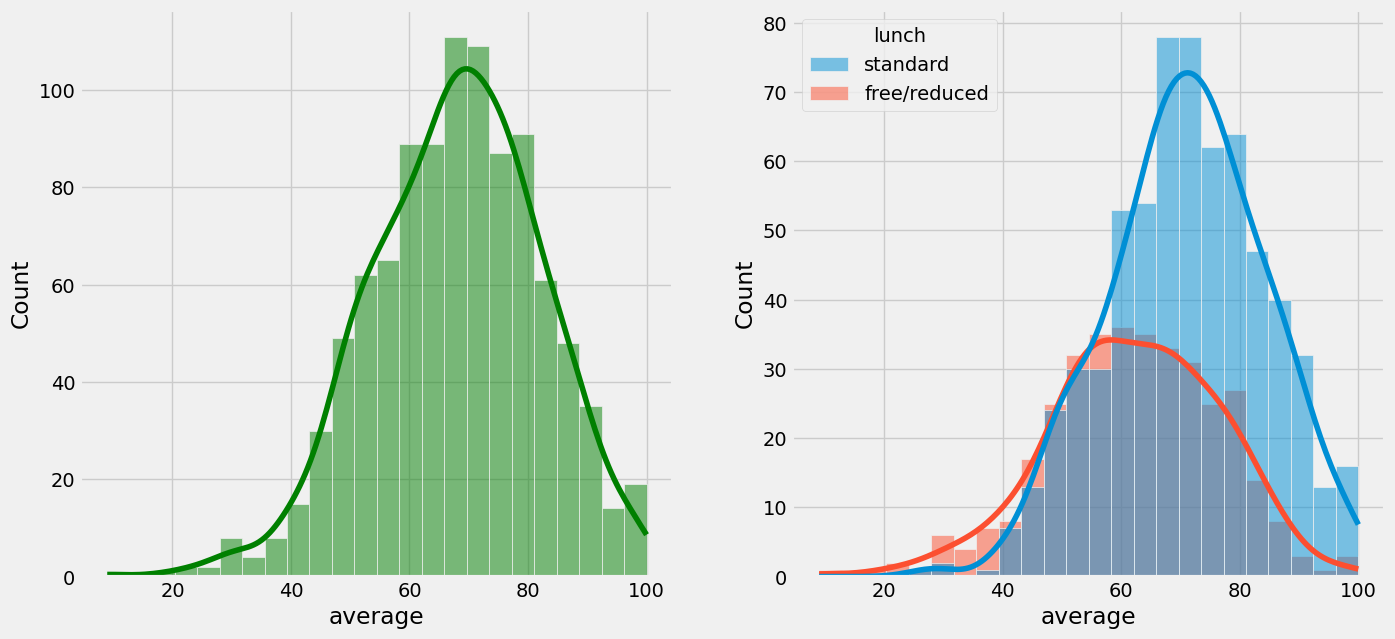

In [90]:
# those who had standard meals(lunch) performed better than others with reduced meals
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

<Axes: xlabel='total score', ylabel='Count'>

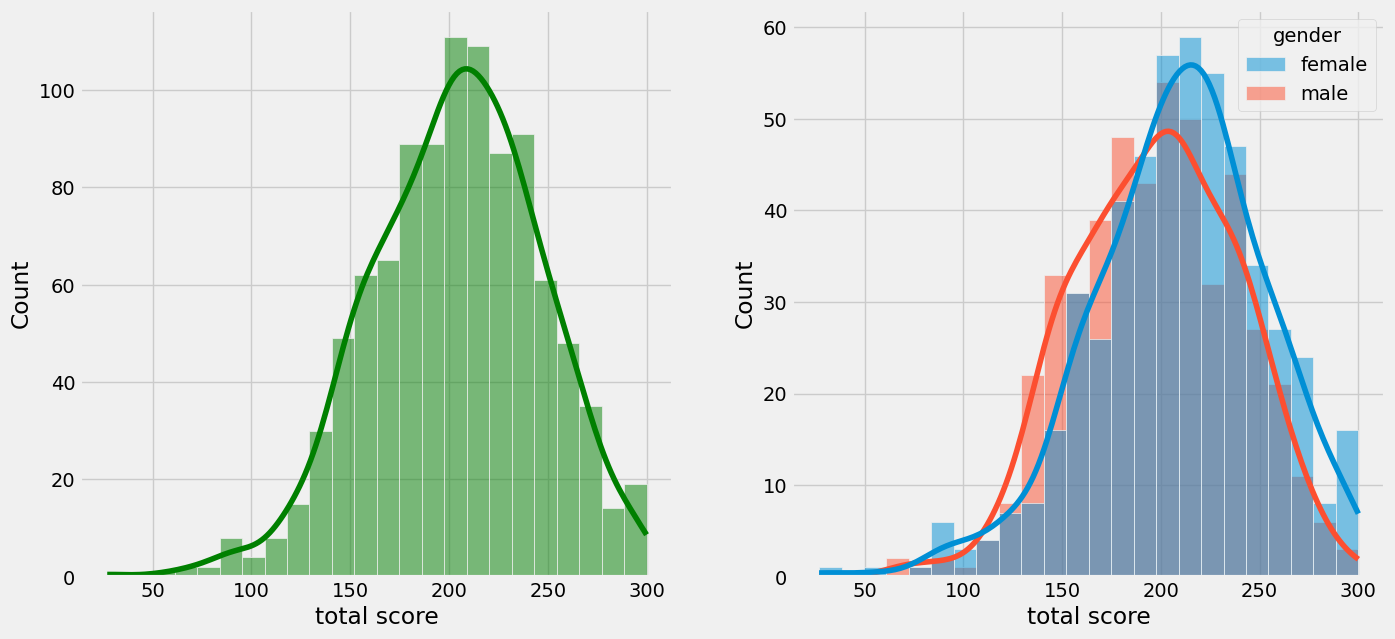

In [91]:
fig, axis = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

##### Insights
Once again, the female students performed better than the male

In [92]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='average', ylabel='Count'>

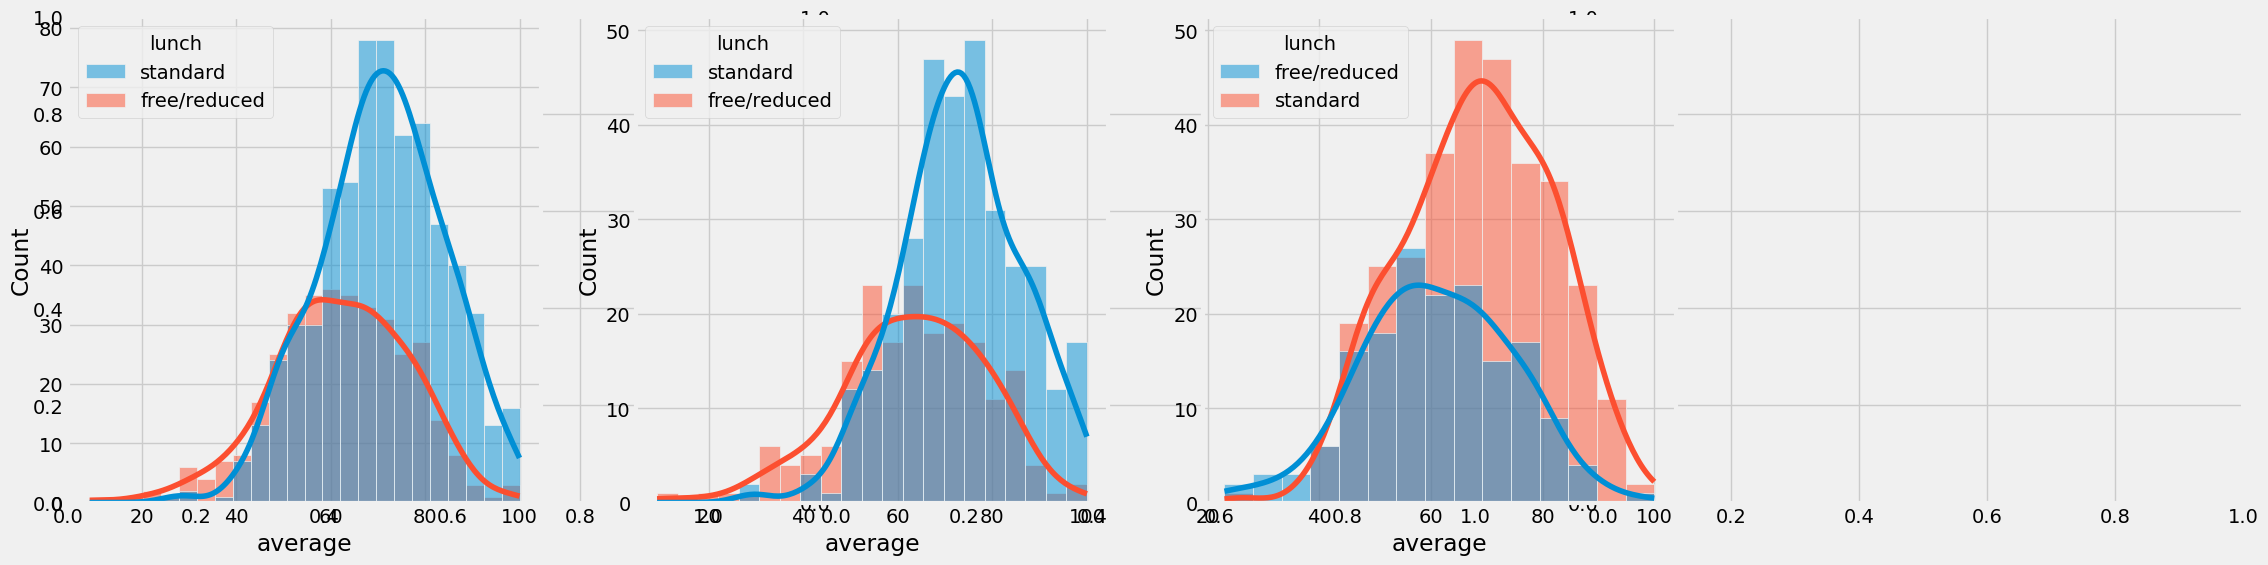

In [93]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')


##### Insights
1. standard lunch help students to perform well
2. standard lunch helps both male and female students to perform well.

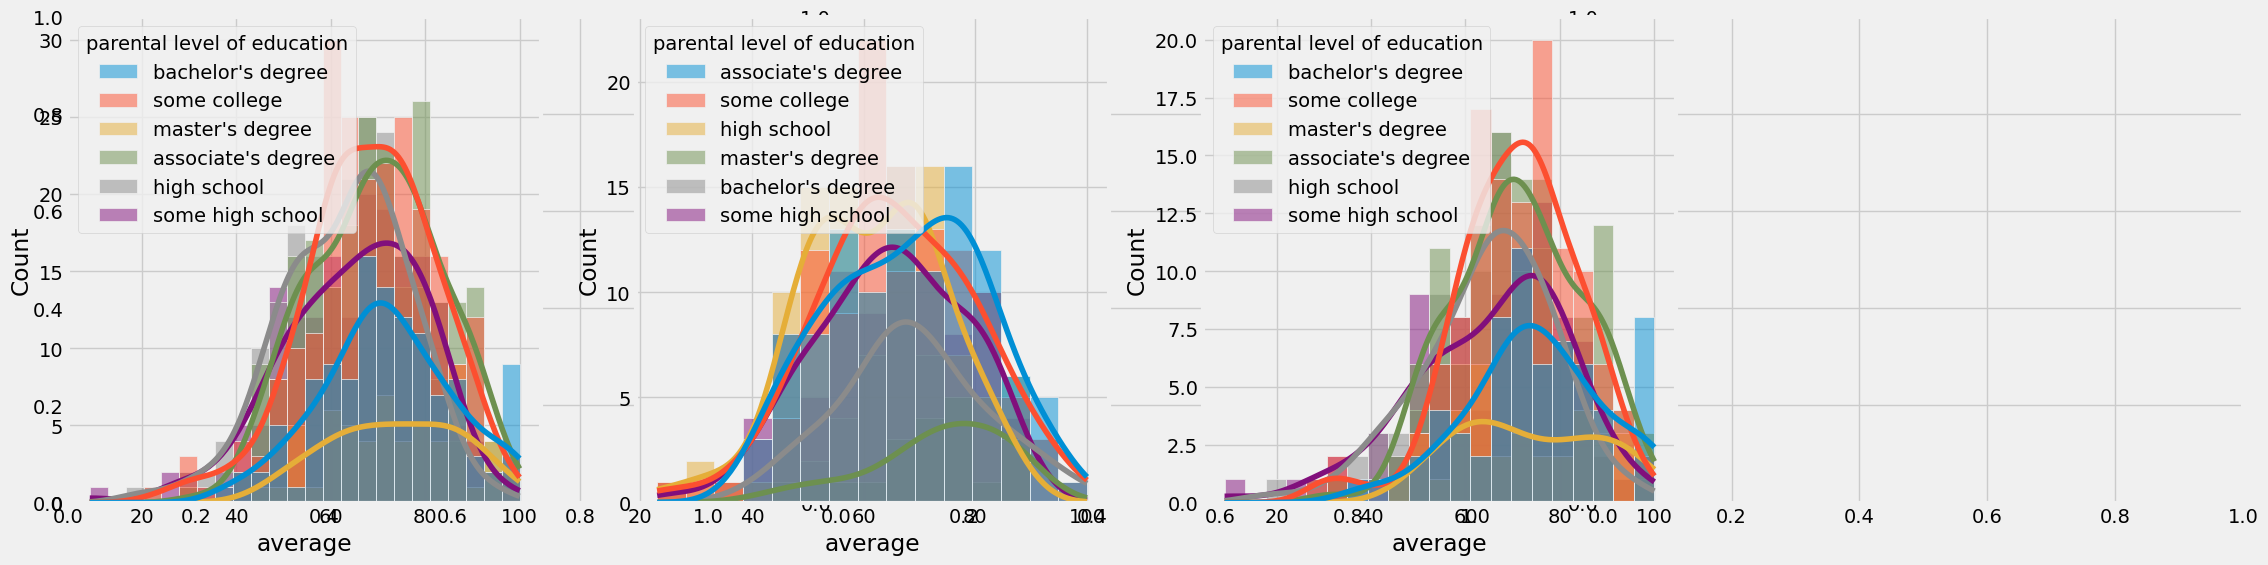

In [94]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

##### Insights
1. In general parent's education don't help student perform well in exam.
2. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3. 3rd plot we can see there is no effect of parent's education on female students.

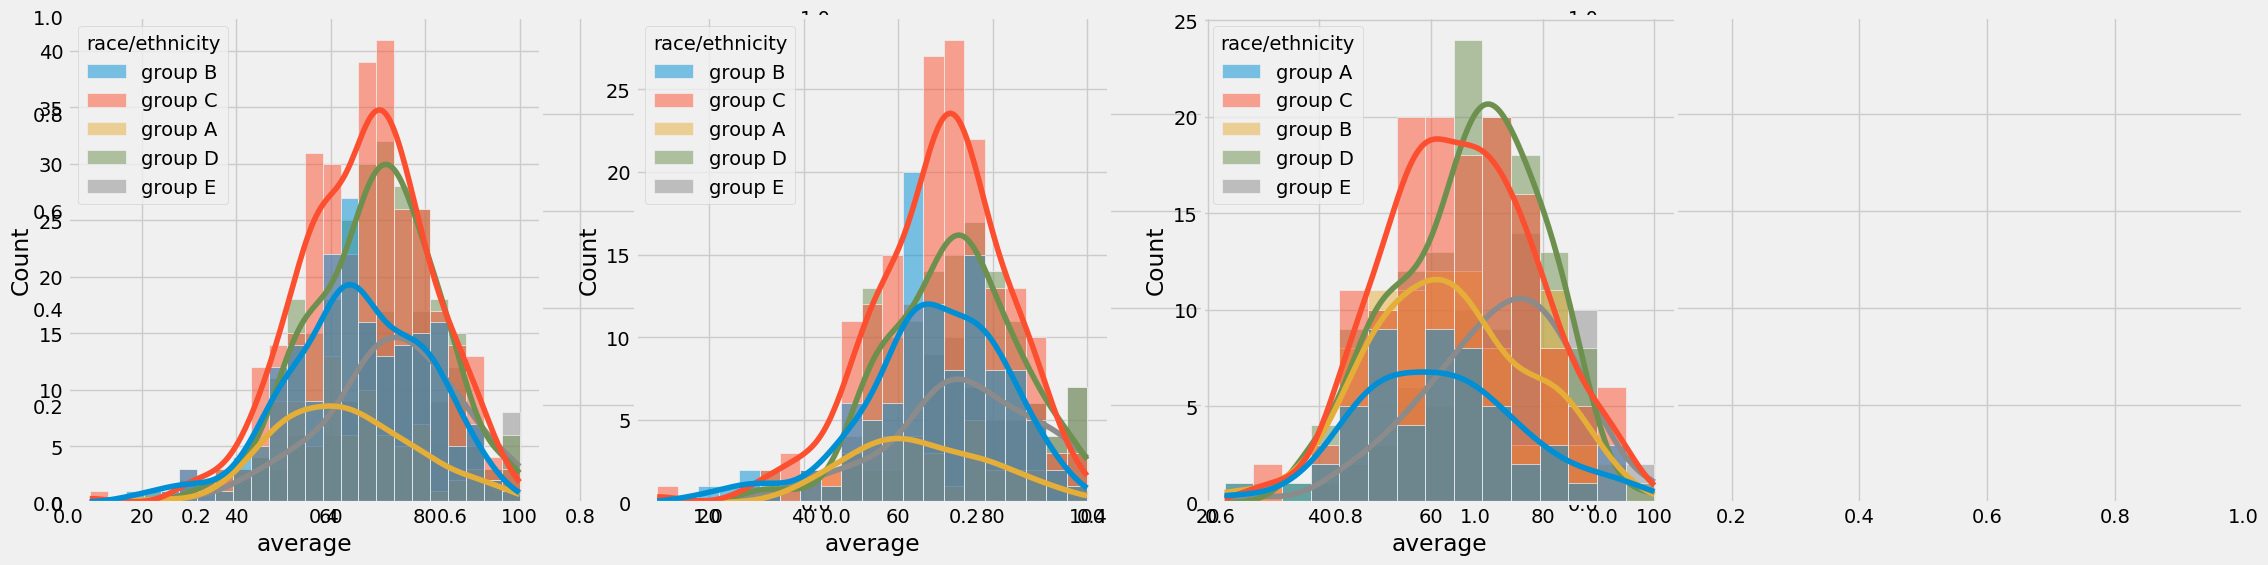

In [95]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

##### Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

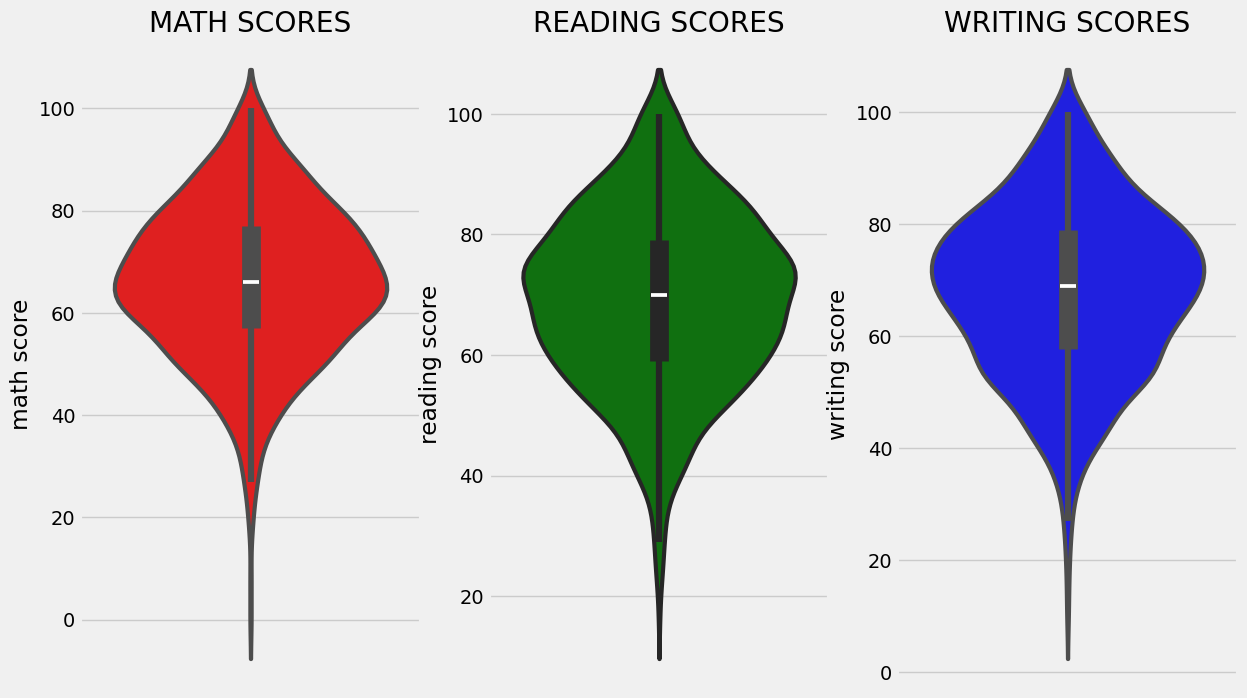

In [96]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

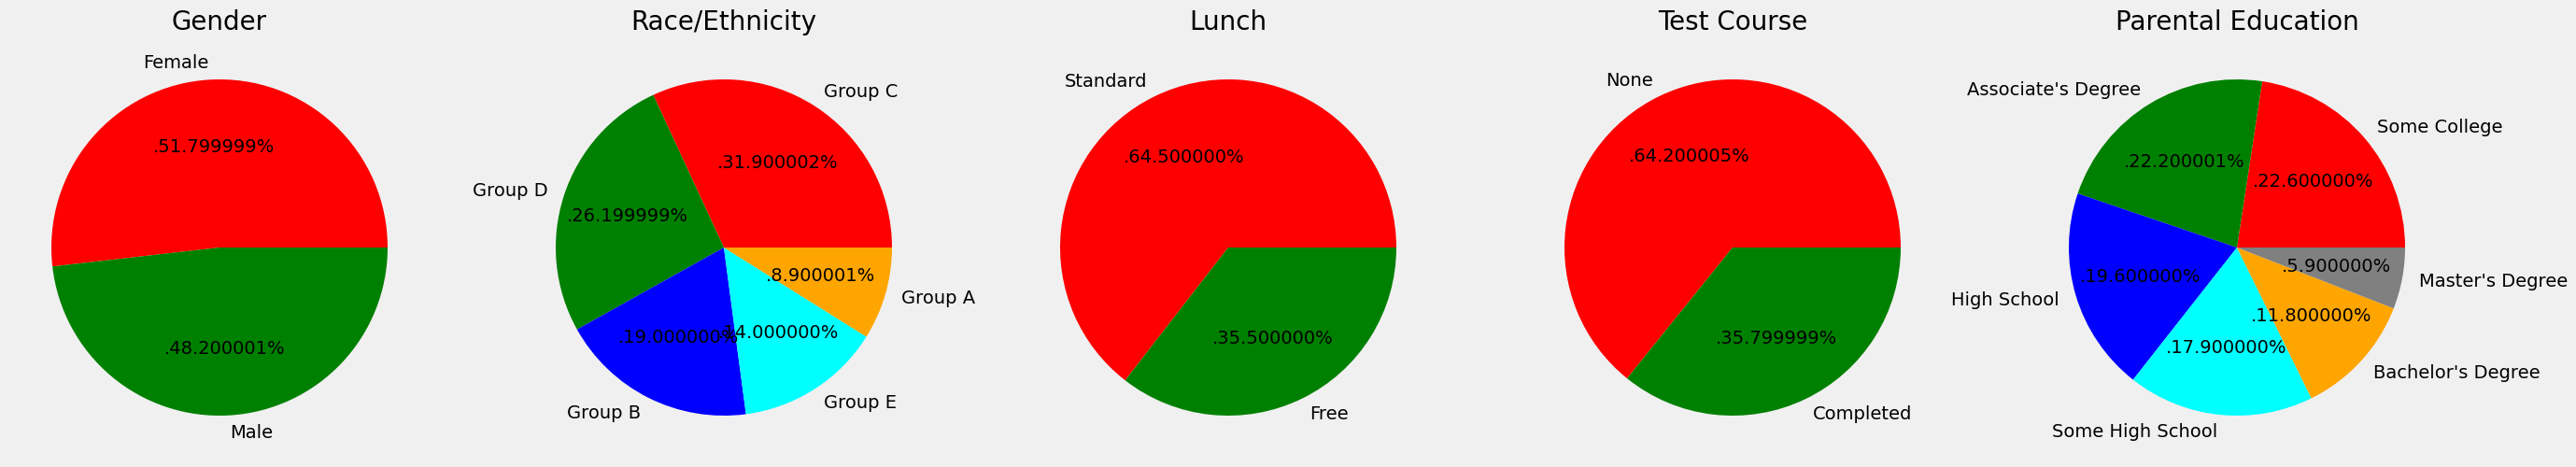

In [97]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


##### Insights
Number of Male and Female students is almost equal\
Number students are greatest in Group C\
Number of students who have standard lunch are greater\
Number of students who have not enrolled in any test preparation course is greater\
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization

##### 4.4.1 Gender Column
1. How is distribution of gender?
2. Does gender impact student's performance?

#### UNIVARIATE ANALYSIS ( How is the distribution of Gender ? )

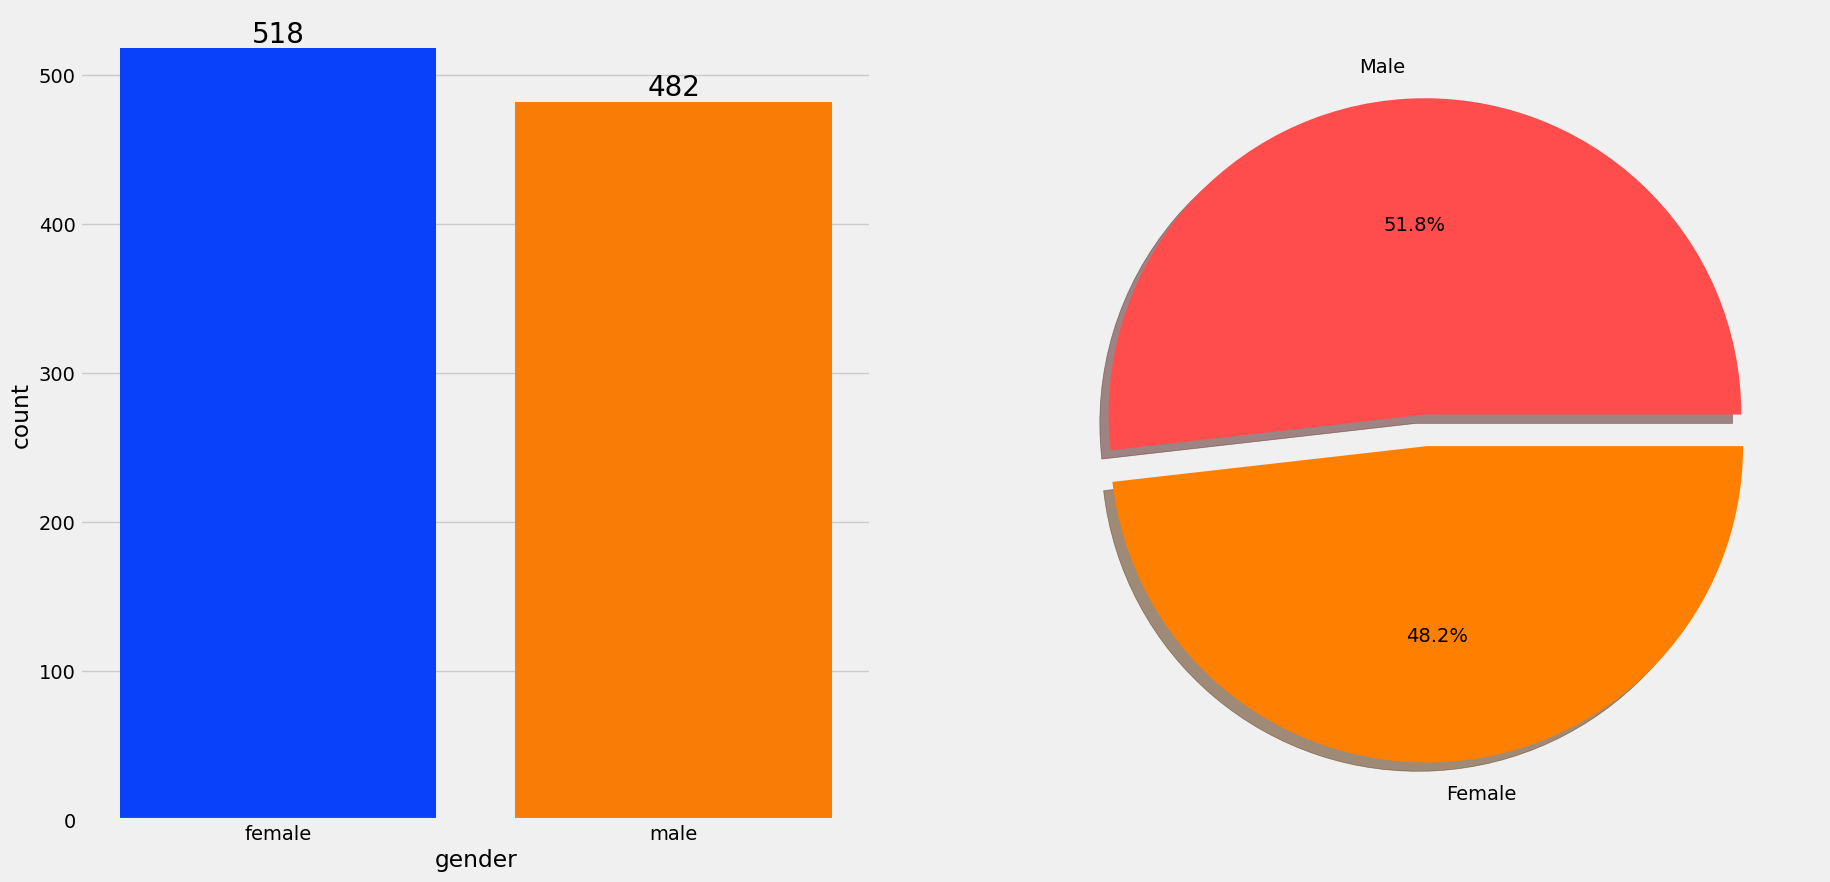

In [98]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### 4.4.2 RACE/EHNICITY COLUMN
How is Group wise distribution ?\
Does Race/Ehnicity have any impact on student's performance ?

###### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

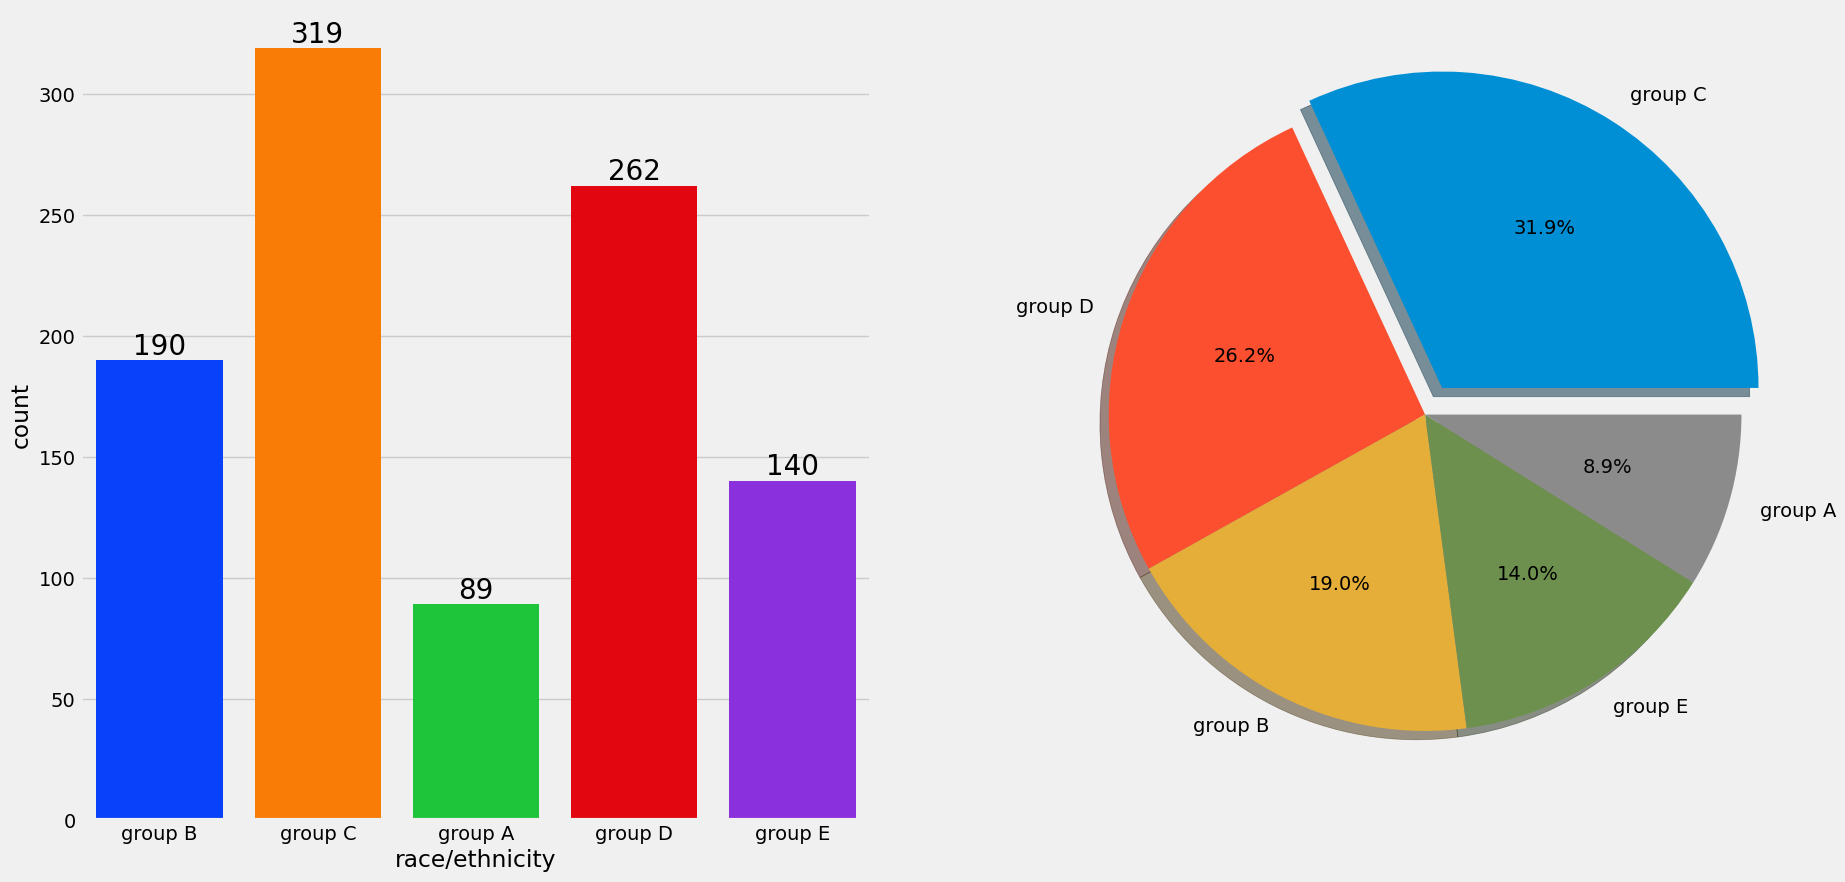

In [99]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

##### Insights
1. Most of the students belong to group C and D
2. lowest number of students belong to group A

##### BIVARIATE ANALYSIS ( Does Race/Ehnicity have any impact on student's performance ? )

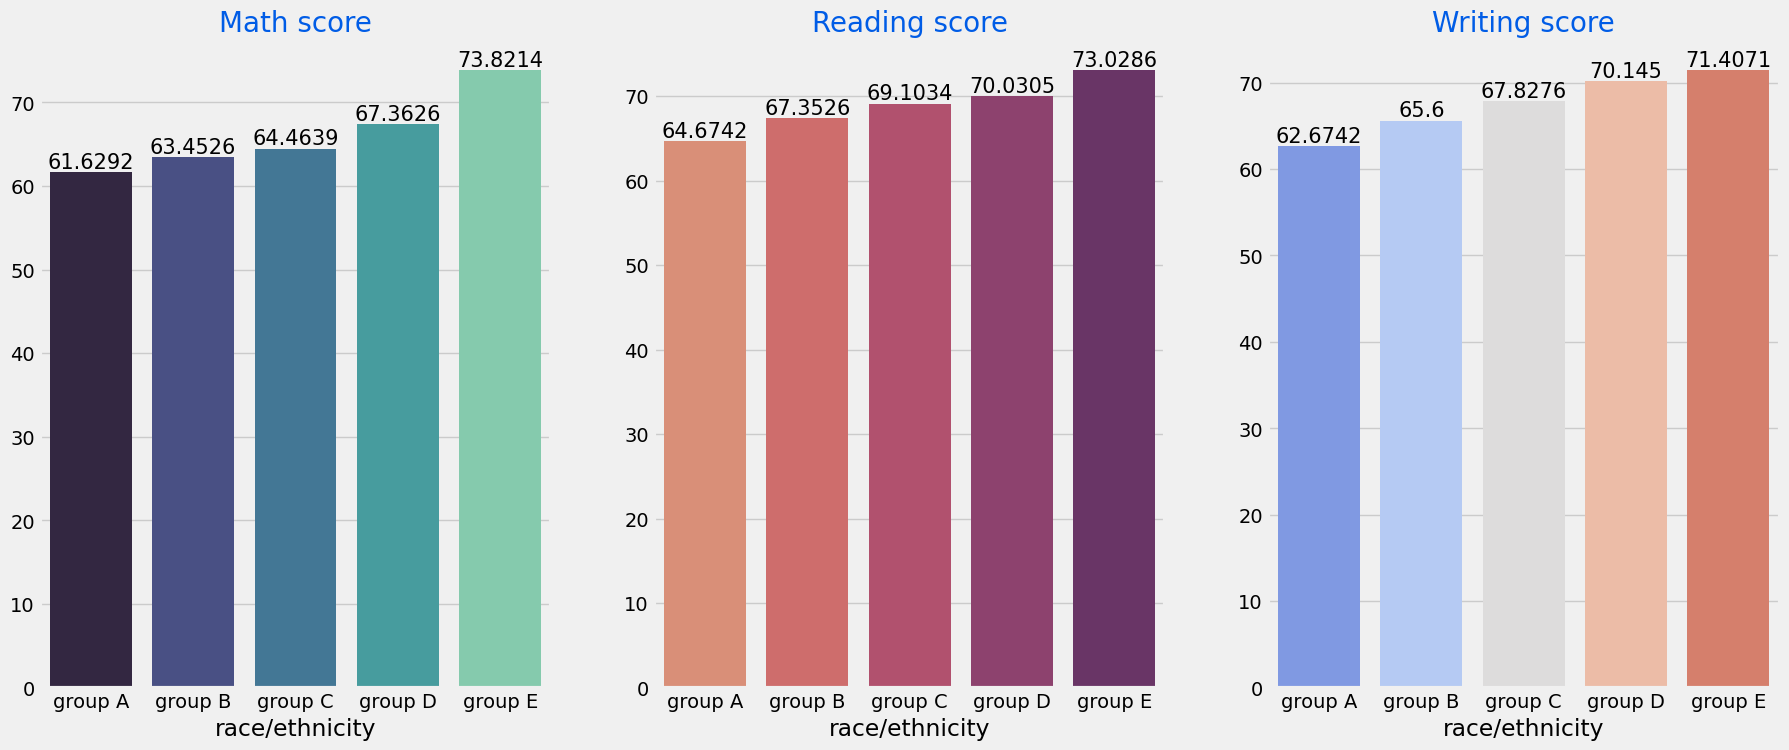

In [100]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

##### Insights
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?\
How does parental education impact on student's performance ?

##### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

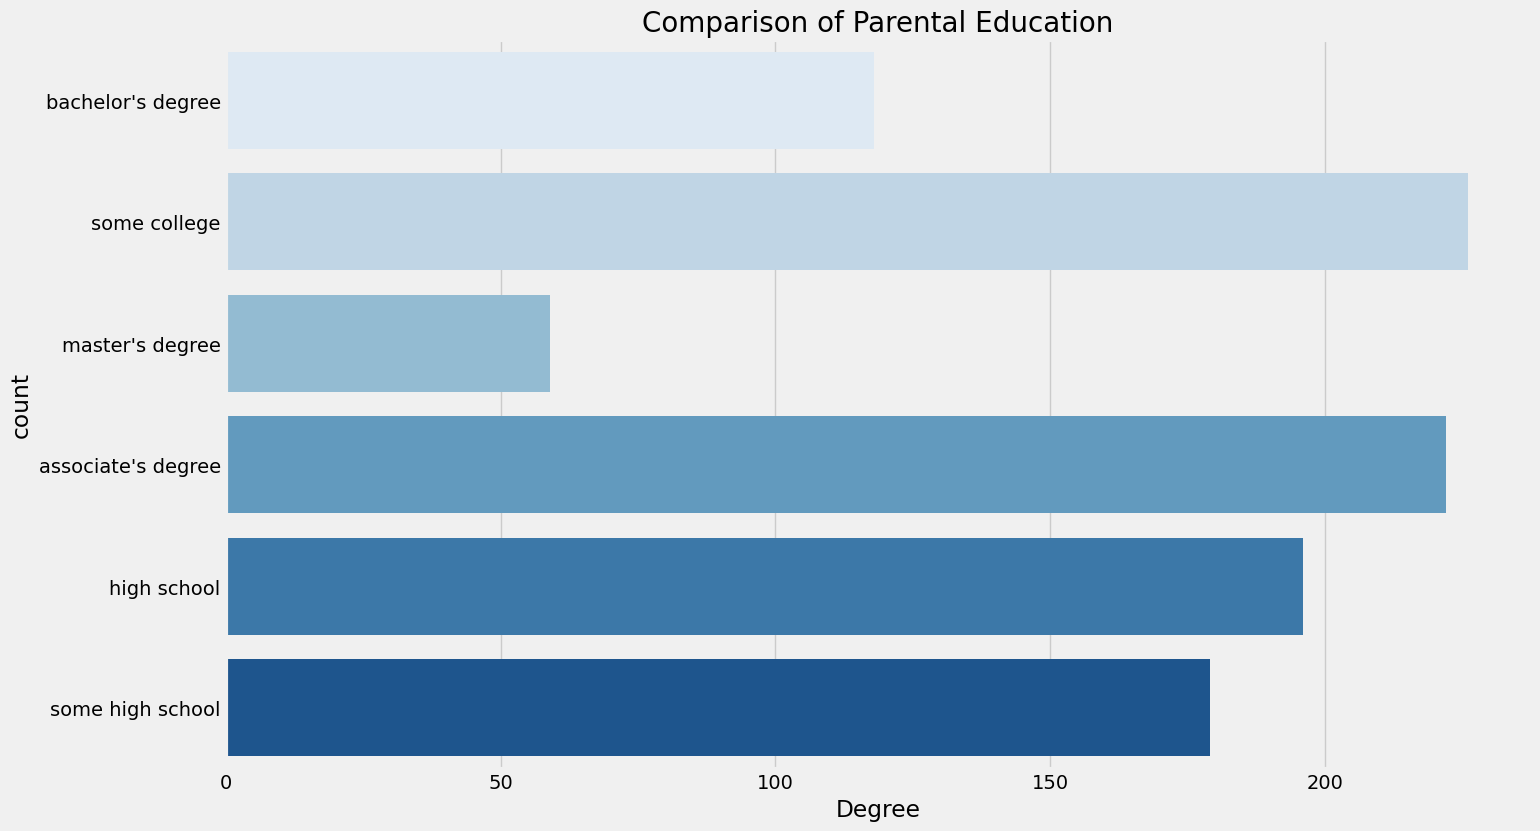

In [101]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

##### Insights
Largest number of parents are from some college

#### BIVARIATE ANALYSIS ( How does parental education impact on student's performance ? )

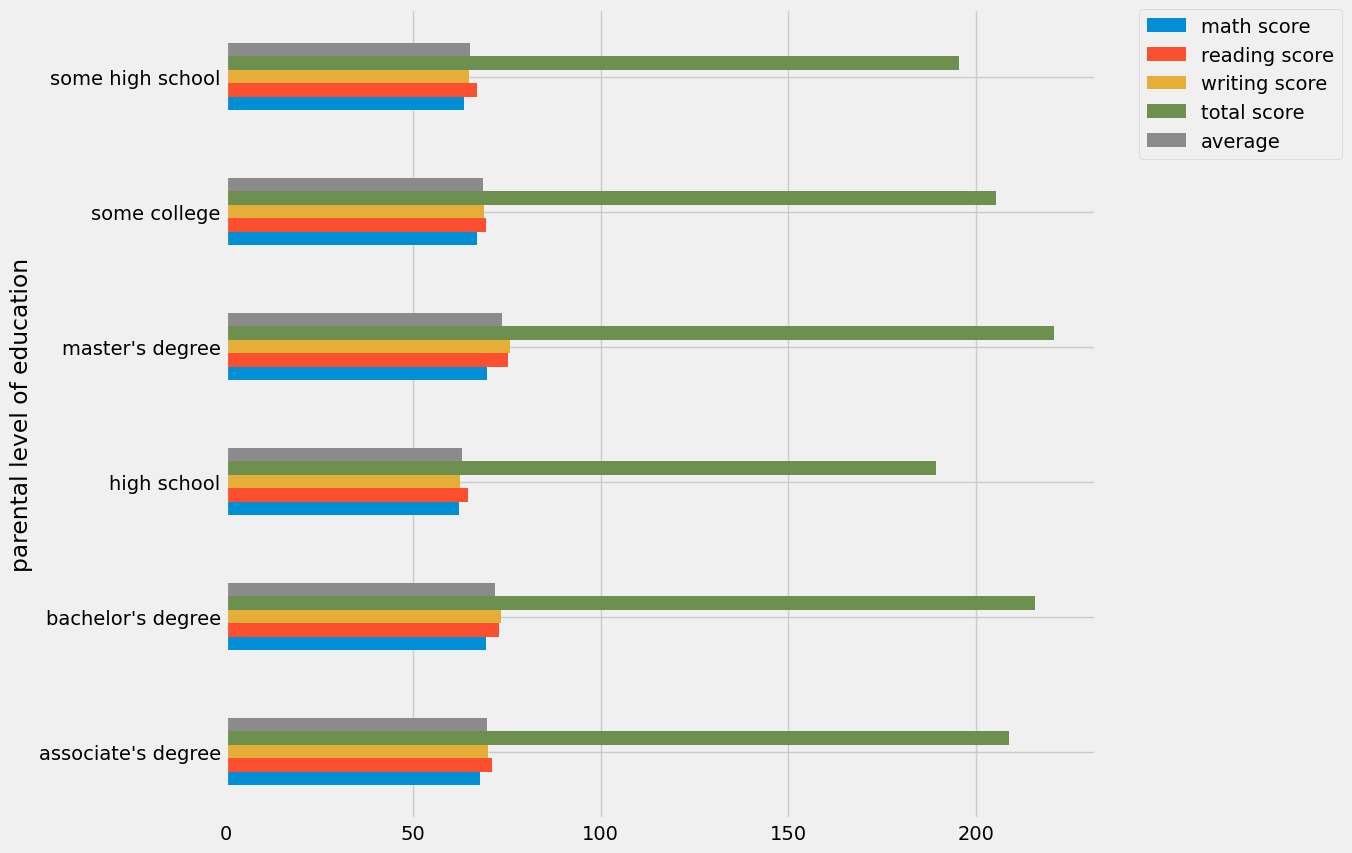

In [107]:
df_grouped = df.groupby('parental level of education').mean(numeric_only=True).reset_index()

# Plotting
df_grouped.plot(
    x='parental level of education',  # Column for x-axis
    kind='barh',
    figsize=(10, 10)
)

# Adjust the legend (if there are multiple columns being plotted)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Show the plot
plt.show()

##### Insights
The score of students whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
Which type of lunch is most common amoung students ?\
What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

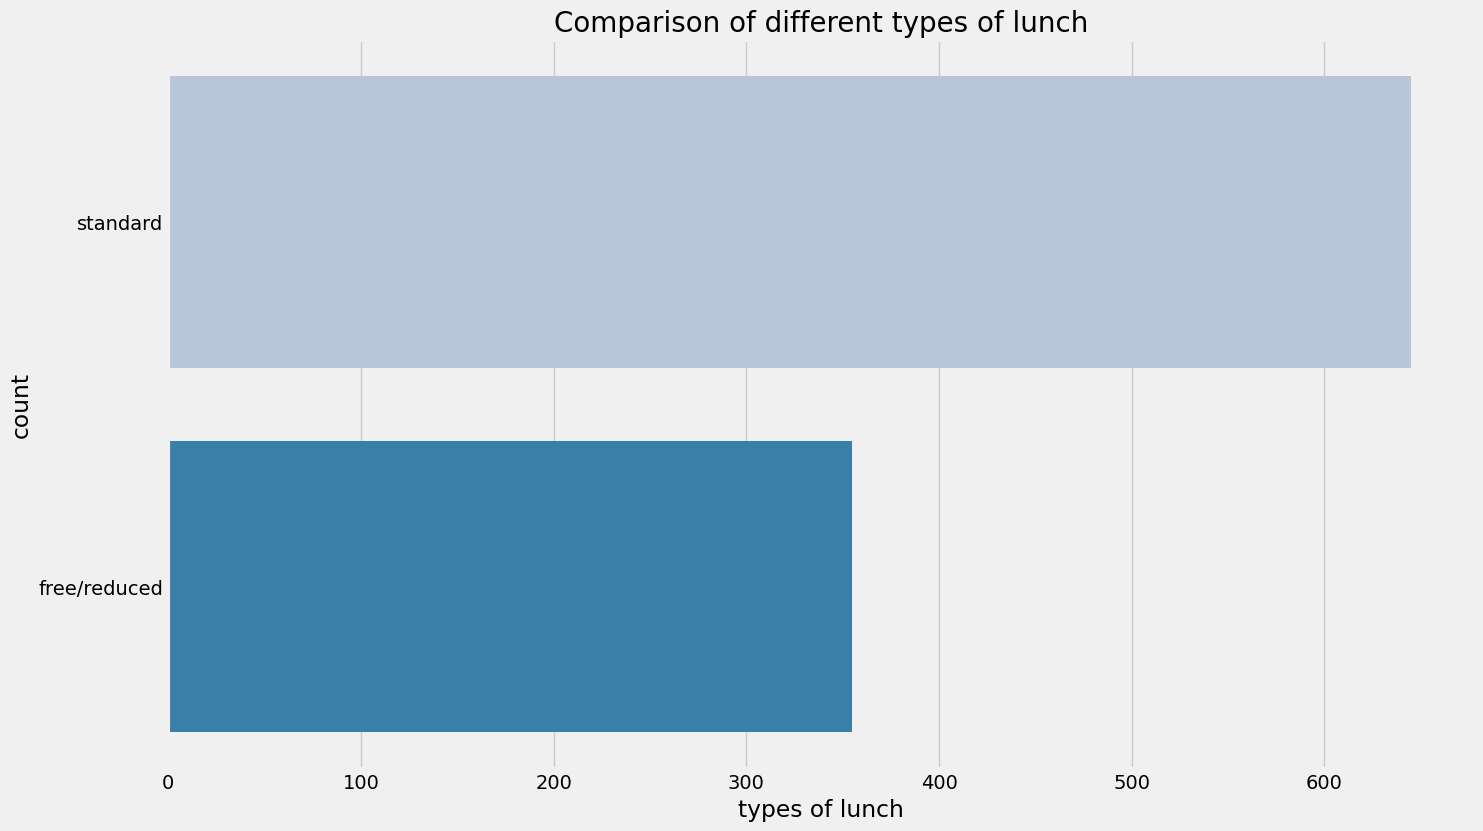

In [109]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### Insights
Students being served Standard lunch are more than the ones on free lunch

In [119]:
print(plt.style.available) # available styles in matplotlib installation

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### BIVARIATE ANALYSIS ( Is lunch type intake of any impact on student's performance ? )

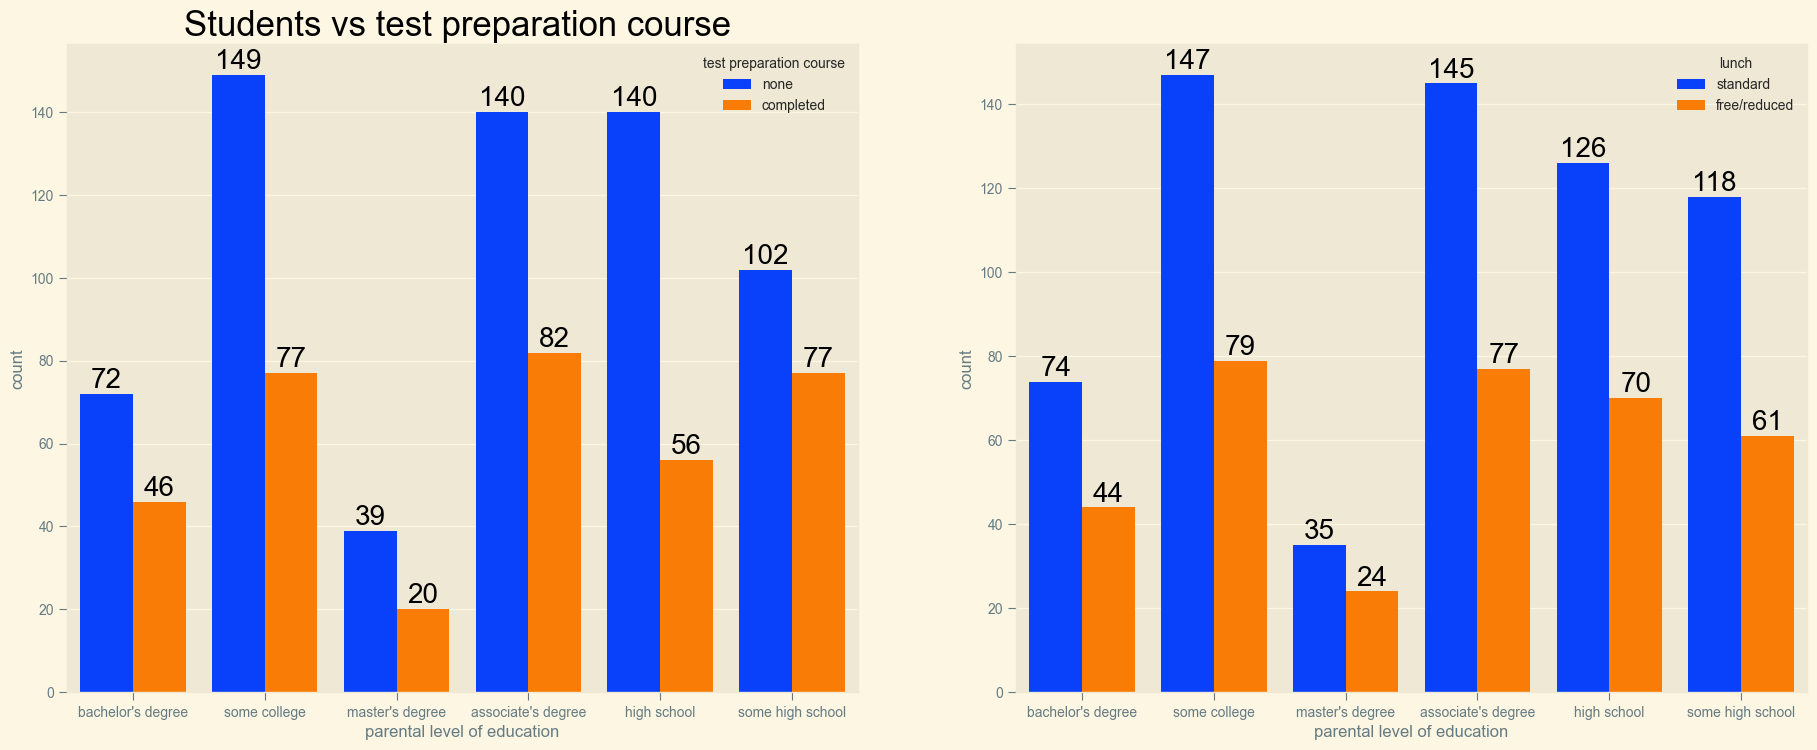

In [120]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

##### Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN
Does Test prepration course have any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Does Test prepration course have any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

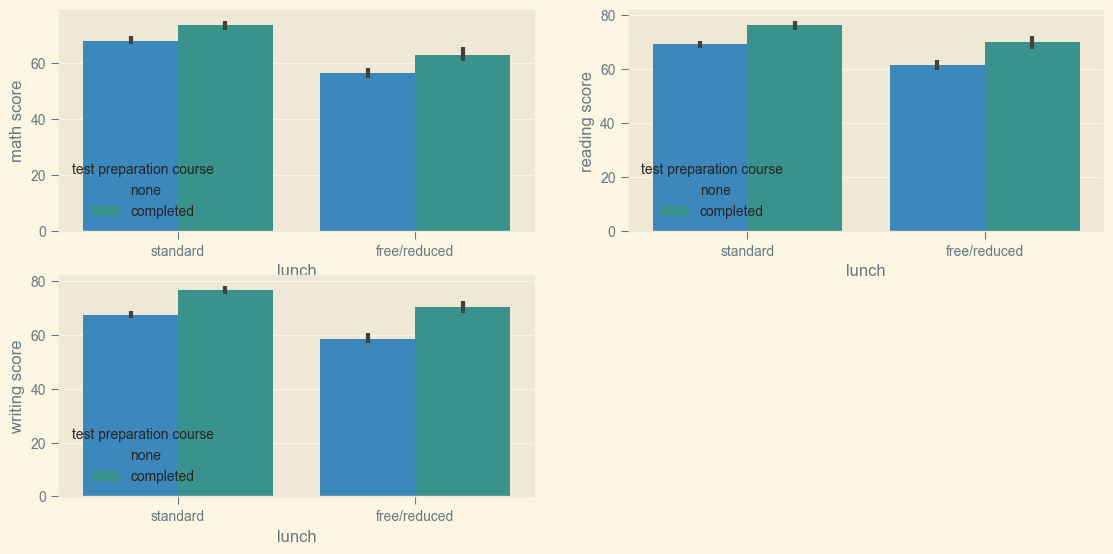

In [126]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

##### Insights
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

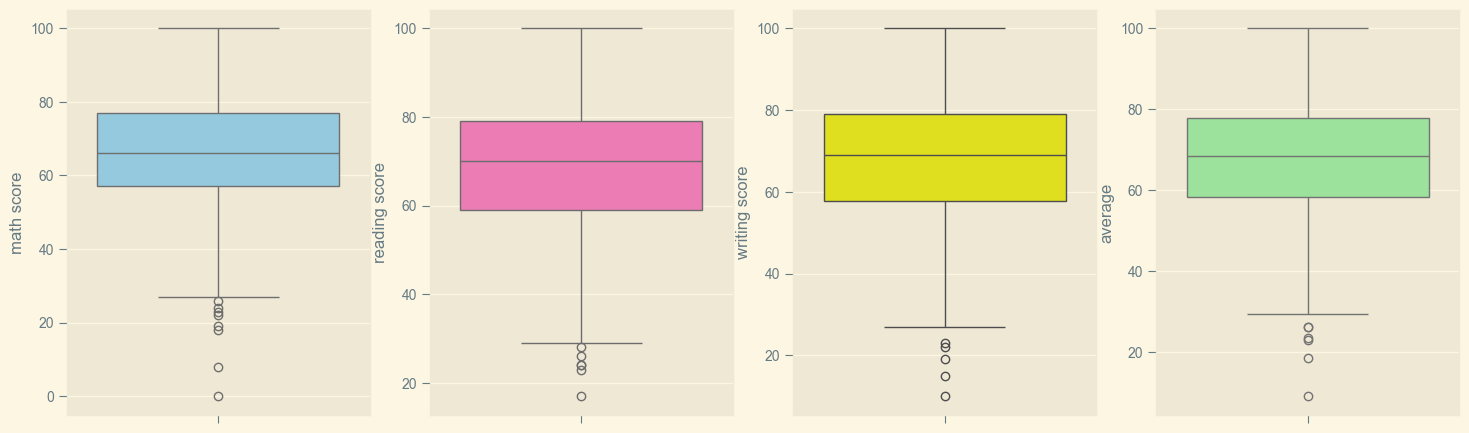

In [127]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

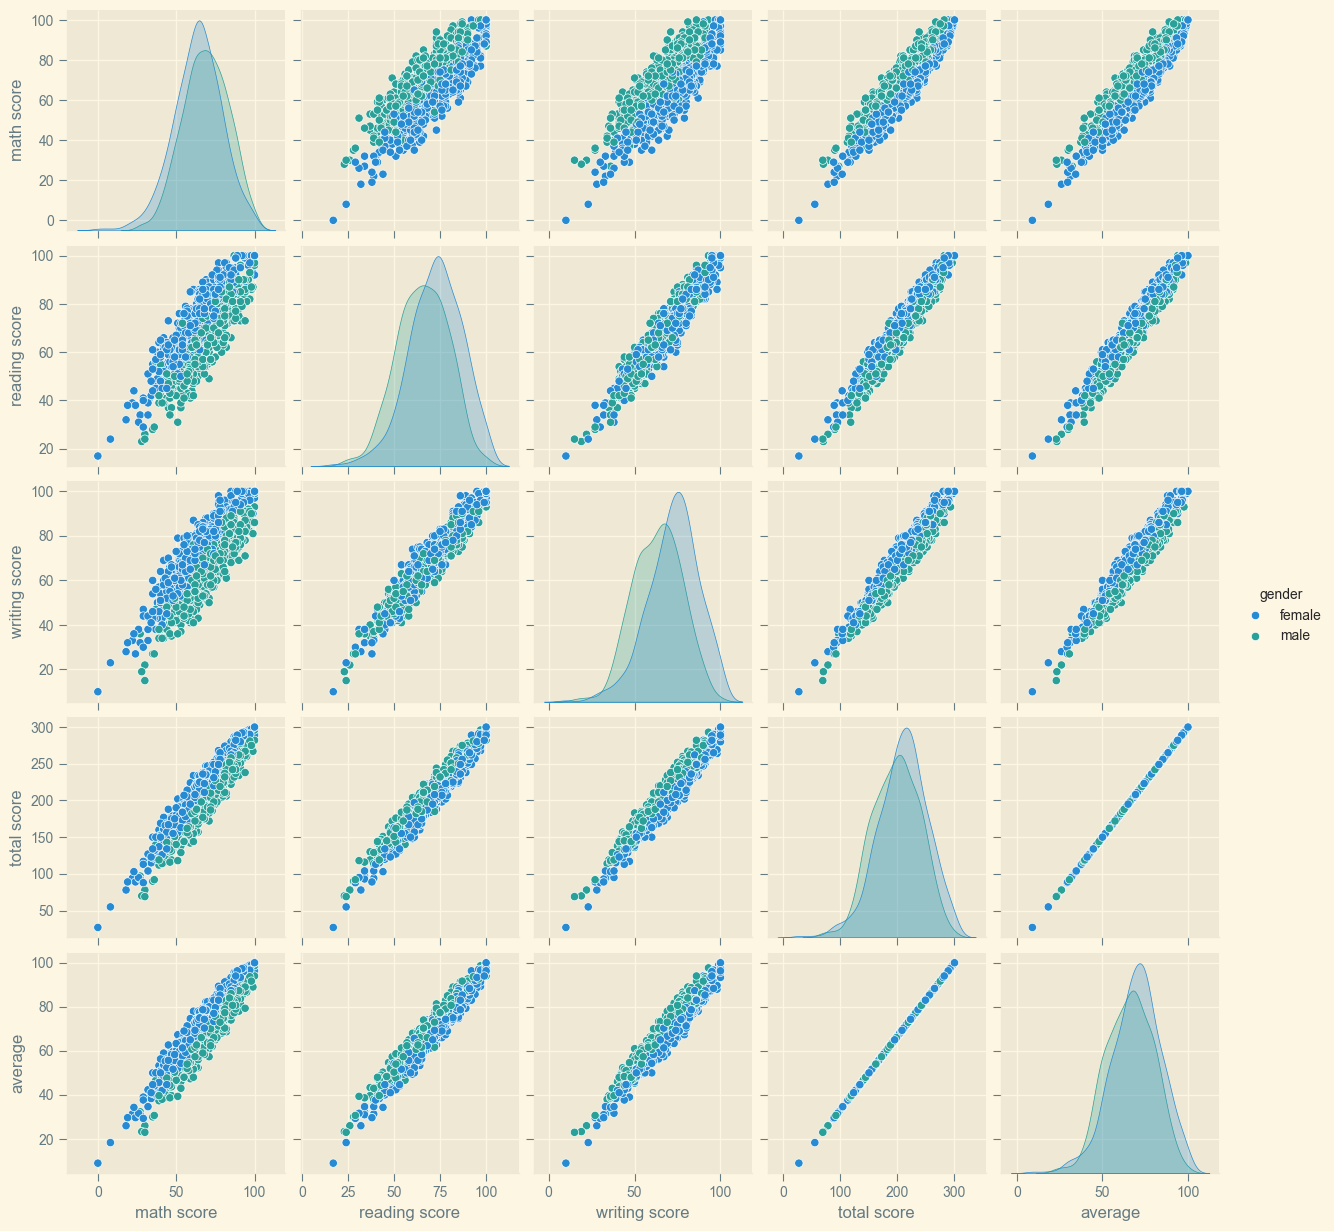

In [128]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
From the above, all scores increase linearly with each other.

#### 5. Conclusions
Student's Performance is related with lunch, race, parental level education\
Females lead in pass percentage and also are top-scorers\
Student's Performance is not much related with test preparation course\
Finishing preparation course is benefitial.